In [341]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import statsmodels.api as sm

from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn import metrics
#from statsmodels.stats import outliers_influence
from statsmodels.formula.api import ols

In [342]:
pd.set_option('display.max_columns', 999)
pd.set_option('display.max_rows', 999)

In [343]:
df = pd.read_csv('datasets/train.csv')

In [344]:
# for column in df.columns:
#     train.rename(columns={columns: column.lower().replace(' ','_')}, inplace=True)

In [345]:
df.dtypes

Id                   int64
PID                  int64
MS SubClass          int64
MS Zoning           object
Lot Frontage       float64
Lot Area             int64
Street              object
Alley               object
Lot Shape           object
Land Contour        object
Utilities           object
Lot Config          object
Land Slope          object
Neighborhood        object
Condition 1         object
Condition 2         object
Bldg Type           object
House Style         object
Overall Qual         int64
Overall Cond         int64
Year Built           int64
Year Remod/Add       int64
Roof Style          object
Roof Matl           object
Exterior 1st        object
Exterior 2nd        object
Mas Vnr Type        object
Mas Vnr Area       float64
Exter Qual          object
Exter Cond          object
Foundation          object
Bsmt Qual           object
Bsmt Cond           object
Bsmt Exposure       object
BsmtFin Type 1      object
BsmtFin SF 1       float64
BsmtFin Type 2      object
B

In [346]:
df.isnull().sum()

Id                    0
PID                   0
MS SubClass           0
MS Zoning             0
Lot Frontage        330
Lot Area              0
Street                0
Alley              1911
Lot Shape             0
Land Contour          0
Utilities             0
Lot Config            0
Land Slope            0
Neighborhood          0
Condition 1           0
Condition 2           0
Bldg Type             0
House Style           0
Overall Qual          0
Overall Cond          0
Year Built            0
Year Remod/Add        0
Roof Style            0
Roof Matl             0
Exterior 1st          0
Exterior 2nd          0
Mas Vnr Type         22
Mas Vnr Area         22
Exter Qual            0
Exter Cond            0
Foundation            0
Bsmt Qual            55
Bsmt Cond            55
Bsmt Exposure        58
BsmtFin Type 1       55
BsmtFin SF 1          1
BsmtFin Type 2       56
BsmtFin SF 2          1
Bsmt Unf SF           1
Total Bsmt SF         1
Heating               0
Heating QC      

In [347]:
len(df[df['Garage Yr Blt'] == df['Year Remod/Add']])

1040

In [348]:
df[df['Bsmt Exposure'].isnull()]

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
12,807,906226060,70,RL,120.0,26400,Pave,NaN,Reg,Bnk,AllPub,FR2,Gtl,SawyerW,Feedr,Norm,1Fam,2Story,5,7,1880,2007,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,GasA,Ex,Y,SBrkr,1288,728,0,2016,0.0,0.0,1,0,4,1,TA,7,Mod,1,TA,Attchd,1900.0,Unf,2.0,576.0,TA,TA,P,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2009,WD,131000
93,811,906226100,90,RL,64.0,7018,Pave,NaN,Reg,Bnk,AllPub,Inside,Gtl,SawyerW,Norm,Norm,Duplex,1Story,5,5,1979,1979,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,Slab,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,GasA,TA,Y,SBrkr,1535,0,0,1535,0.0,0.0,2,0,4,2,TA,8,Typ,0,NaN,Attchd,1979.0,Unf,2.0,400.0,TA,TA,Y,0,0,0,0,0,0,NaN,GdPrv,NaN,0,6,2009,WD,118858
114,781,905228050,20,RL,NaN,9000,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,Sawyer,Norm,Norm,1Fam,1Story,2,2,1947,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,Slab,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,GasA,Fa,N,SBrkr,660,0,0,660,0.0,0.0,1,0,2,1,Fa,5,Min2,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,N,0,0,100,0,0,0,NaN,NaN,NaN,0,6,2009,WD,63900
146,888,908128060,85,RL,64.0,7301,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,Edwards,Norm,Norm,1Fam,SFoyer,7,5,2003,2003,Gable,CompShg,HdBoard,HdBoard,BrkFace,500.0,Gd,TA,Slab,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,GasA,Ex,Y,SBrkr,495,1427,0,1922,0.0,0.0,3,0,4,1,Gd,7,Typ,1,Ex,BuiltIn,2003.0,RFn,2.0,672.0,TA,TA,Y,0,0,177,0,0,0,NaN,NaN,NaN,0,7,2009,ConLD,198500
183,1554,910251050,20,A (agr),80.0,14584,Pave,NaN,Reg,Low,AllPub,Inside,Mod,IDOTRR,Norm,Norm,1Fam,1Story,1,5,1952,1952,Gable,CompShg,AsbShng,VinylSd,None,0.0,Fa,Po,Slab,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,Wall,Po,N,FuseA,733,0,0,733,0.0,0.0,1,0,2,1,Fa,4,Sal,0,NaN,Attchd,1952.0,Unf,2.0,487.0,Fa,Po,N,0,0,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,13100
240,2740,905451050,20,RL,80.0,12048,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,5,6,1952,2002,Gable,CompShg,Wd Sdng,Wd Sdng,BrkFace,232.0,TA,TA,Slab,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,GasA,Gd,Y,SBrkr,1488,0,0,1488,0.0,0.0,1,0,3,1,TA,7,Typ,1,Ex,Attchd,2002.0,RFn,2.0,569.0,TA,TA,Y,0,189,36,0,348,0,NaN,NaN,NaN,0,4,2006,WD,135000
249,2242,910206010,50,RM,64.0,11067,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,IDOTRR,Norm,Norm,1Fam,1.5Fin,2,4,1939,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,BrkTil,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,GasA,Ex,Y,SBrkr,640,0,205,845,0.0,0.0,1,0,1,1,TA,4,Maj2,0,NaN,Detchd,1950.0,Unf,1.0,256.0,TA,Fa,N,48,0,0,0,0,0,NaN,NaN,NaN,0,3,2007,WD,68104
256,2745,905477010,20,RL,77.0,8335,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,Edwards,Norm,Norm,1Fam,1Story,5,5,1954,1954,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,Slab,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,GasA,Gd,Y,SBrkr,1124,0,0,1124,0.0,0.0,1,0,3,1,TA,5,Min2,1,Gd,NaN,NaN,NaN,0.0,0.0,NaN,NaN,N,0,36,190,0,0,0,NaN,NaN,NaN,0,4,2006,WD,93000
390,84,532351140,90,RM,68.0,8930,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Sawyer,RRAe,Norm,Duplex,1.5Fin,6,5,1978,1978,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,Slab,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,GasA,TA,Y,SBrkr,1318,584,0,1902,0.0,0.0,2,0,4,2,TA,8,Typ,0,NaN,Attchd,1978.0,Unf,2.0,539.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,W

In [349]:
df[df['Garage Finish'].isnull()]

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
28,2243,911103060,190,C (all),75.0,8250,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Feedr,Norm,2fmCon,2Story,5,6,1895,2006,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,957.0,957.0,GasA,Fa,N,SBrkr,1034,957,0,1991,0.0,0.0,2,0,4,2,TA,9,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,N,0,0,133,0,0,0,NaN,NaN,NaN,0,6,2007,WD,119600
53,330,923226250,160,RM,21.0,1476,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,7,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,GLQ,176.0,Unf,0.0,370.0,546.0,GasA,Ex,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,5,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,200,26,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,76000
65,2278,923202134,20,RL,70.0,8402,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Feedr,Norm,1Fam,1Story,5,5,2007,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,ALQ,206.0,Unf,0.0,914.0,1120.0,GasA,Ex,Y,SBrkr,1120,0,0,1120,0.0,0.0,1,0,3,1,TA,6,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,30,0,0,0,0,NaN,NaN,NaN,0,12,2007,New,147000
79,2235,910201050,50,RM,50.0,7288,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Artery,Norm,1Fam,1.5Fin,5,7,1925,2003,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,Gd,BrkTil,TA,Po,No,Unf,0.0,Unf,0.0,936.0,936.0,GasA,Ex,Y,SBrkr,936,665,0,1601,0.0,0.0,2,0,3,1,TA,6,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,N,0,0,0,176,0,0,NaN,NaN,NaN,0,9,2007,WD,129850
101,2084,905476170,30,RL,58.0,9098,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,4,7,1920,2002,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,BrkTil,TA,TA,Mn,ALQ,348.0,Unf,0.0,180.0,528.0,GasA,Ex,Y,SBrkr,605,0,0,605,1.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,N,0,0,144,0,0,0,NaN,NaN,NaN,0,7,2007,WD,86000
103,728,902477130,30,C (all),72.0,9392,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,IDOTRR,Norm,Norm,1Fam,1Story,3,3,1900,1950,Mansard,CompShg,AsbShng,AsbShng,None,0.0,TA,Fa,CBlock,Fa,TA,No,Unf,0.0,Unf,0.0,245.0,245.0,GasA,TA,N,SBrkr,797,0,0,797,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,N,0,36,94,0,0,0,NaN,NaN,NaN,0,9,2009,WD,44000
114,781,905228050,20,RL,NaN,9000,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,Sawyer,Norm,Norm,1Fam,1Story,2,2,1947,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,Slab,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,GasA,Fa,N,SBrkr,660,0,0,660,0.0,0.0,1,0,2,1,Fa,5,Min2,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,N,0,0,100,0,0,0,NaN,NaN,NaN,0,6,2009,WD,63900
120,1492,908127120,30,RL,63.0,13907,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,5,6,1940,1969,Gable,CompShg,WdShing,Wd Shng,None,0.0,TA,TA,CBlock,TA,TA,No,BLQ,290.0,Unf,0.0,706.0,996.0,GasA,Ex,Y,SBrkr,996,0,0,996,1.0,0.0,1,0,3,1,TA,6,Typ,1,Gd,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,144,0,0,0,0,0,NaN,NaN,NaN,0,7,2008,WD,108000
134,1514,909100170,30,RL,67.0,5604,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,5,6,1925,1950,Gable,CompShg,Stucco,Stucco,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,Unf,0.0,396.0,864.0,GasA,TA,N,FuseA,864,0,0,864,1.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,0,96,0,0,0,NaN,NaN,NaN,0,4,2008,WD,98000
136,216,905

In [350]:
df[df['Fireplace Qu'].isnull() & df['Fireplaces'] != 0]


,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice


In [351]:
df['Garage Cond'].value_counts()

TA    1868
Fa      47
Gd      12
Po       8
Ex       2
Name: Garage Cond, dtype: int64

In [352]:
ordinal_list = ['Exter Qual', 'Exter Cond', 'Bsmt Qual', 'Bsmt Cond', 'Heating QC', 'Kitchen Qual', 'Fireplace Qu',
           'Garage Qual', 'Garage Cond', 'Pool QC']

qual_to_quant_scale = {'Ex': 5, 'Gd': 4, 'TA':3, 'Fa':2, 'Po': 1}

df[ordinal_list] = df[ordinal_list].applymap(qual_to_quant_scale.get)


# df['Kitchen Qual'].value_counts()
#df.loc[:, q_to_q_list] = df[q_to_q_list].fillna(0)
#df[ordinal_list].dtypes

In [353]:
df.loc[:, ordinal_list] = df[ordinal_list].astype(float)
df.loc[:, ordinal_list] = df[ordinal_list].fillna(0)
# df['Exter Qual'] = df['Exter Qual'].fillna(0)
# df['Exter Qual'] = df['Exter Qual'].fillna(0)
# df['Exter Cond'] = df['Exter Cond'].fillna(0)
# df['Bsmt Qual'] = df['Bsmt Qual'].fillna(0)
# df['Bsmt Cond'] = df['Bsmt Cond'].fillna(0)
# df['Heating QC'] = df['Heating QC'].fillna(0)
# df['Kitchen Qual'] = df['Kitchen Qual'].fillna(0)
# df['Fireplace Qu'] = df['Fireplace Qu'].fillna(0)
# df['Garage Qual'] = df['Garage Qual'].fillna(0)
# df['Garage Cond'] = df['Garage Cond'].fillna(0)
# df['Pool QC'] = df['Pool QC'].fillna(0)

In [354]:
df['Bsmt Exposure'].value_counts()

No    1339
Av     288
Gd     203
Mn     163
Name: Bsmt Exposure, dtype: int64

In [355]:
df['Lot Frontage'].describe()

count    1721.000000
mean       69.055200
std        23.260653
min        21.000000
25%        58.000000
50%        68.000000
75%        80.000000
max       313.000000
Name: Lot Frontage, dtype: float64

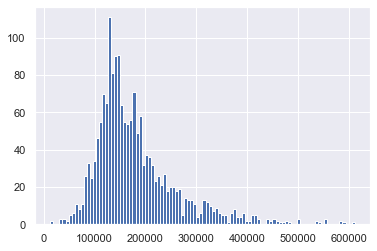

In [356]:
plt.hist(x=df[~df['Lot Frontage'].isna()]['SalePrice'], bins=100);

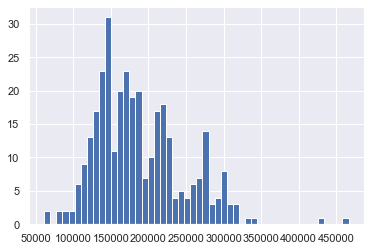

In [357]:
plt.hist(x=df[df['Lot Frontage'].isna()]['SalePrice'], bins=50);

In [358]:
# impute with mean. Confirm with .describe(). Run both median and mean. Or impute with 0
# Houses without lot frontage are not different from houses with lot frontage
# Plot Lot frontage vs lot area
#df['Lot Frontage'] = df['Lot Frontage'].fillna(df['Lot Frontage'].mean())
df['Lot Frontage'] = df['Lot Frontage'].fillna(0)

In [359]:
df[df['Mas Vnr Area'].isna()]

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
22,2393,528142010,60,RL,103.0,12867,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NridgHt,Norm,Norm,1Fam,2Story,8,5,2005,2006,Gable,CompShg,CemntBd,CmentBd,NaN,NaN,4.0,3.0,PConc,5.0,3.0,Av,Unf,0.0,Unf,0.0,1209.0,1209.0,GasA,5.0,Y,SBrkr,1209,1044,0,2253,0.0,0.0,2,1,3,1,5.0,8,Typ,1,4.0,Attchd,2005.0,Fin,2.0,575.0,3.0,3.0,Y,243,142,0,0,0,0,0.0,NaN,NaN,0,7,2006,New,344133
41,2383,528110050,20,RL,107.0,13891,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,1Story,10,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,5.0,3.0,PConc,5.0,4.0,Gd,GLQ,1386.0,Unf,0.0,690.0,2076.0,GasA,5.0,Y,SBrkr,2076,0,0,2076,1.0,0.0,2,1,2,1,5.0,7,Typ,1,4.0,Attchd,2006.0,Fin,3.0,850.0,3.0,3.0,Y,216,229,0,0,0,0,0.0,NaN,NaN,0,9,2006,New,465000
86,539,531371050,20,RL,67.0,10083,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,4.0,3.0,PConc,4.0,3.0,No,GLQ,833.0,Unf,0.0,343.0,1176.0,GasA,5.0,Y,SBrkr,1200,0,0,1200,1.0,0.0,2,0,2,1,4.0,5,Typ,0,0.0,Attchd,2003.0,RFn,2.0,555.0,3.0,3.0,Y,0,41,0,0,0,0,0.0,NaN,NaN,0,8,2009,WD,184900
212,518,528458020,20,FV,90.0,7993,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,7,5,2008,2009,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,4.0,3.0,PConc,5.0,3.0,No,Unf,0.0,Unf,0.0,1436.0,1436.0,GasA,5.0,Y,SBrkr,1436,0,0,1436,0.0,0.0,2,0,3,1,4.0,6,Typ,0,0.0,Attchd,2008.0,Fin,2.0,529.0,3.0,3.0,Y,0,121,0,0,0,0,0.0,NaN,NaN,0,10,2009,New,225000
276,2824,908130020,20,RL,75.0,8050,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,6,5,2002,2002,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,3.0,3.0,PConc,4.0,3.0,Av,GLQ,475.0,ALQ,297.0,142.0,914.0,GasA,5.0,Y,SBrkr,914,0,0,914,1.0,0.0,1,0,2,1,4.0,4,Typ,0,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,N,32,0,0,0,0,0,0.0,NaN,NaN,0,4,2006,WD,117250
338,1800,528458150,60,FV,112.0,12217,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,2Story,8,5,2007,2007,Hip,CompShg,WdShing,Wd Shng,NaN,NaN,4.0,3.0,PConc,5.0,3.0,Av,GLQ,745.0,Unf,0.0,210.0,955.0,GasA,5.0,Y,SBrkr,955,925,0,1880,1.0,0.0,2,1,3,1,5.0,8,Typ,1,4.0,Attchd,2007.0,Fin,3.0,880.0,3.0,3.0,Y,168,127,0,0,0,0,0.0,NaN,NaN,0,12,2007,New,310013
431,1455,907251090,60,RL,75.0,9473,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,8,5,2002,2002,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,4.0,3.0,PConc,4.0,3.0,No,GLQ,804.0,Unf,0.0,324.0,1128.0,GasA,5.0,Y,SBrkr,1128,903,0,2031,1.0,0.0,2,1,3,1,4.0,7,Typ,1,4.0,Attchd,2002.0,RFn,2.0,577.0,3.0,3.0,Y,0,211,0,0,0,0,0.0,NaN,NaN,0,3,2008,WD,237000
451,1120,528439010,20,RL,87.0,10037,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,Somerst,Feedr,Norm,1Fam,1Story,8,5,2006,2007,Hip,CompShg,VinylSd,VinylSd,NaN,NaN,4.0,3.0,PConc,5.0,3.0,No,GLQ,666.0,Unf,0.0,794.0,1460.0,GasA,5.0,Y,SBrkr,1460,0,0,1460,0.0,0.0,2,0,3,1,4.0,6,Typ,1,4.0,Attchd,2006.0,Fin,2.0,480.0,3.0,3.0,Y,0,20,0,0,0,0,0.0,NaN,NaN,0,8,2008,WD,247000
591,1841,533208040,120,FV,35.0,4274,Pave,Pave,IR1,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,TwnhsE,1Story,7,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,4.0,3.0,PConc,4.0,3.0,No,GLQ,1106.0,Unf,0.0,135.0,1241.0,GasA,5.0,Y,SBrkr,

In [360]:
# All null masonry veneer area values also have a null masonry veneer type
len(df[df['Mas Vnr Area'].isna() & ~df['Mas Vnr Type'].isna()])

0

In [361]:
df[df['Mas Vnr Type'] == 'None']['Mas Vnr Area'].value_counts()

0.0      1213
1.0         3
344.0       1
288.0       1
Name: Mas Vnr Area, dtype: int64

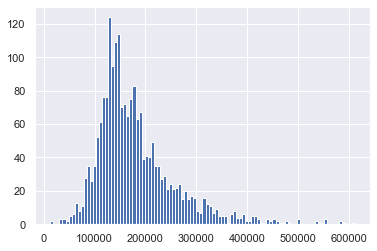

In [362]:
plt.hist(x=df[~df['Mas Vnr Area'].isna()]['SalePrice'], bins=100);

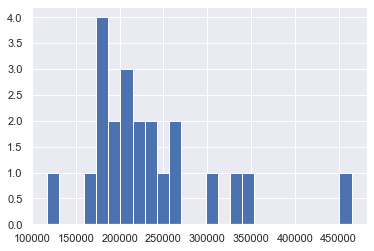

In [363]:
plt.hist(x=df[df['Mas Vnr Area'].isna()]['SalePrice'], bins=25);

In [364]:
df['Mas Vnr Area'].fillna(0, inplace=True)

In [365]:
df[df['Mas Vnr Type'].isnull()]

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
22,2393,528142010,60,RL,103.0,12867,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NridgHt,Norm,Norm,1Fam,2Story,8,5,2005,2006,Gable,CompShg,CemntBd,CmentBd,NaN,0.0,4.0,3.0,PConc,5.0,3.0,Av,Unf,0.0,Unf,0.0,1209.0,1209.0,GasA,5.0,Y,SBrkr,1209,1044,0,2253,0.0,0.0,2,1,3,1,5.0,8,Typ,1,4.0,Attchd,2005.0,Fin,2.0,575.0,3.0,3.0,Y,243,142,0,0,0,0,0.0,NaN,NaN,0,7,2006,New,344133
41,2383,528110050,20,RL,107.0,13891,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,1Story,10,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,5.0,3.0,PConc,5.0,4.0,Gd,GLQ,1386.0,Unf,0.0,690.0,2076.0,GasA,5.0,Y,SBrkr,2076,0,0,2076,1.0,0.0,2,1,2,1,5.0,7,Typ,1,4.0,Attchd,2006.0,Fin,3.0,850.0,3.0,3.0,Y,216,229,0,0,0,0,0.0,NaN,NaN,0,9,2006,New,465000
86,539,531371050,20,RL,67.0,10083,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,4.0,3.0,PConc,4.0,3.0,No,GLQ,833.0,Unf,0.0,343.0,1176.0,GasA,5.0,Y,SBrkr,1200,0,0,1200,1.0,0.0,2,0,2,1,4.0,5,Typ,0,0.0,Attchd,2003.0,RFn,2.0,555.0,3.0,3.0,Y,0,41,0,0,0,0,0.0,NaN,NaN,0,8,2009,WD,184900
212,518,528458020,20,FV,90.0,7993,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,7,5,2008,2009,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,4.0,3.0,PConc,5.0,3.0,No,Unf,0.0,Unf,0.0,1436.0,1436.0,GasA,5.0,Y,SBrkr,1436,0,0,1436,0.0,0.0,2,0,3,1,4.0,6,Typ,0,0.0,Attchd,2008.0,Fin,2.0,529.0,3.0,3.0,Y,0,121,0,0,0,0,0.0,NaN,NaN,0,10,2009,New,225000
276,2824,908130020,20,RL,75.0,8050,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,6,5,2002,2002,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,3.0,3.0,PConc,4.0,3.0,Av,GLQ,475.0,ALQ,297.0,142.0,914.0,GasA,5.0,Y,SBrkr,914,0,0,914,1.0,0.0,1,0,2,1,4.0,4,Typ,0,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,N,32,0,0,0,0,0,0.0,NaN,NaN,0,4,2006,WD,117250
338,1800,528458150,60,FV,112.0,12217,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,2Story,8,5,2007,2007,Hip,CompShg,WdShing,Wd Shng,NaN,0.0,4.0,3.0,PConc,5.0,3.0,Av,GLQ,745.0,Unf,0.0,210.0,955.0,GasA,5.0,Y,SBrkr,955,925,0,1880,1.0,0.0,2,1,3,1,5.0,8,Typ,1,4.0,Attchd,2007.0,Fin,3.0,880.0,3.0,3.0,Y,168,127,0,0,0,0,0.0,NaN,NaN,0,12,2007,New,310013
431,1455,907251090,60,RL,75.0,9473,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,8,5,2002,2002,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,4.0,3.0,PConc,4.0,3.0,No,GLQ,804.0,Unf,0.0,324.0,1128.0,GasA,5.0,Y,SBrkr,1128,903,0,2031,1.0,0.0,2,1,3,1,4.0,7,Typ,1,4.0,Attchd,2002.0,RFn,2.0,577.0,3.0,3.0,Y,0,211,0,0,0,0,0.0,NaN,NaN,0,3,2008,WD,237000
451,1120,528439010,20,RL,87.0,10037,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,Somerst,Feedr,Norm,1Fam,1Story,8,5,2006,2007,Hip,CompShg,VinylSd,VinylSd,NaN,0.0,4.0,3.0,PConc,5.0,3.0,No,GLQ,666.0,Unf,0.0,794.0,1460.0,GasA,5.0,Y,SBrkr,1460,0,0,1460,0.0,0.0,2,0,3,1,4.0,6,Typ,1,4.0,Attchd,2006.0,Fin,2.0,480.0,3.0,3.0,Y,0,20,0,0,0,0,0.0,NaN,NaN,0,8,2008,WD,247000
591,1841,533208040,120,FV,35.0,4274,Pave,Pave,IR1,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,TwnhsE,1Story,7,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,4.0,3.0,PConc,4.0,3.0,No,GLQ,1106.0,Unf,0.0,135.0,1241.0,GasA,5.0,Y,SBrkr,

In [366]:
df[df['Mas Vnr Type'] == 'None']

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,3.0,4.0,CBlock,3.0,3.0,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,3.0,Y,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,4.0,5,Typ,0,0.0,Detchd,1953.0,Unf,1.0,246.0,3.0,3.0,Y,0,52,0,0,0,0,0.0,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,3.0,3.0,PConc,4.0,3.0,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,4.0,Y,SBrkr,744,700,0,1444,0.0,0.0,2,1,3,1,3.0,7,Typ,0,0.0,BuiltIn,2007.0,Fin,2.0,400.0,3.0,3.0,Y,100,0,0,0,0,0,0.0,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,3.0,3.0,PConc,2.0,4.0,No,Unf,0.0,Unf,0.0,676.0,676.0,GasA,3.0,Y,SBrkr,831,614,0,1445,0.0,0.0,2,0,3,1,3.0,6,Typ,0,0.0,Detchd,1957.0,Unf,2.0,484.0,3.0,3.0,N,0,59,0,0,0,0,0.0,NaN,NaN,0,3,2010,WD,138500
5,138,535126040,20,RL,137.0,16492,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,PosA,Norm,1Fam,1Story,6,6,1966,2002,Gable,CompShg,BrkFace,Plywood,None,0.0,4.0,3.0,CBlock,3.0,3.0,No,ALQ,247.0,Rec,713.0,557.0,1517.0,GasA,5.0,Y,SBrkr,1888,0,0,1888,0.0,0.0,2,1,2,1,4.0,6,Mod,1,4.0,Attchd,1966.0,Fin,2.0,578.0,3.0,3.0,Y,0,0,0,0,0,0,0.0,NaN,NaN,0,6,2010,WD,190000
8,1942,535353130,20,RL,0.0,15783,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1Story,5,5,1952,1952,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,3.0,3.0,CBlock,3.0,3.0,No,Rec,292.0,Unf,0.0,632.0,924.0,GasA,3.0,Y,SBrkr,924,0,0,924,0.0,0.0,1,0,2,1,3.0,6,Typ,0,0.0,Detchd,1952.0,Unf,1.0,420.0,3.0,3.0,Y,0,324,0,0,0,0,0.0,MnPrv,Shed,400,6,2007,WD,112500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2046,1587,921126030,20,RL,79.0,11449,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,1Story,8,5,2007,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,4.0,3.0,PConc,4.0,3.0,Av,GLQ,1011.0,Unf,0.0,873.0,1884.0,GasA,5.0,Y,SBrkr,1728,0,0,1728,1.0,0.0,2,0,3,1,4.0,7,Typ,1,4.0,Attchd,2007.0,Fin,2.0,520.0,3.0,3.0,Y,0,276,0,0,0,0,0.0,NaN,NaN,0,1,2008,WD,298751
2047,785,905377130,30,RL,0.0,12342,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,4,5,1940,1950,Gable,CompShg,VinylSd,VinylSd,None,0.0,3.0,3.0,CBlock,3.0,3.0,No,BLQ,262.0,Unf,0.0,599.0,861.0,GasA,5.0,Y,SBrkr,861,0,0,861,0.0,0.0,1,0,1,1,3.0,4,Typ,0,0.0,Detchd,1961.0,Unf,2.0,539.0,3.0,3.0,Y,158,0,0,0,0,0,0.0,NaN,NaN,0,3,2009,WD,82500
2048,916,909253010,50,RL,57.0,7558,Pave,NaN,Reg,Bnk,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,1.5Fin,6,6,1928,1950,Gable,CompShg,BrkFace,Stone,None,0.0,3.0,3.0,BrkTil,3.0,3.0,No,Unf,0.0,Unf,0.0,896.0,896.0,GasA,4.0,Y,SBrkr,1172,741,0,1913,0.0,0.0,1,1,3,1,3.0,9,Typ,1,3.0

In [367]:
df[df['BsmtFin SF 1'].isna()]

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
1327,1342,903230120,20,RM,99.0,5940,Pave,NaN,IR1,Lvl,AllPub,FR3,Gtl,BrkSide,Feedr,Norm,1Fam,1Story,4,7,1946,1950,Gable,CompShg,MetalSd,CBlock,None,0.0,3.0,3.0,PConc,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GasA,3.0,Y,FuseA,896,0,0,896,NaN,NaN,1,0,2,1,3.0,4,Typ,0,0.0,Detchd,1946.0,Unf,1.0,280.0,3.0,3.0,Y,0,0,0,0,0,0,0.0,MnPrv,NaN,0,4,2008,ConLD,79000


In [368]:
df['BsmtFin SF 1'].fillna(0, inplace=True)
df['BsmtFin SF 2'].fillna(0, inplace=True)
df['Bsmt Unf SF'].fillna(0, inplace=True)
df['Total Bsmt SF'].fillna(0, inplace=True)

In [369]:
df[df['Bsmt Full Bath'].isna()]

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
616,1498,908154080,20,RL,123.0,47007,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,5,7,1959,1996,Gable,CompShg,Plywood,Plywood,None,0.0,3.0,3.0,Slab,0.0,0.0,NaN,NaN,0.0,NaN,0.0,0.0,0.0,GasA,3.0,Y,SBrkr,3820,0,0,3820,NaN,NaN,3,1,5,1,5.0,11,Typ,2,4.0,Attchd,1959.0,Unf,2.0,624.0,3.0,3.0,Y,0,372,0,0,0,0,0.0,NaN,NaN,0,7,2008,WD,284700
1327,1342,903230120,20,RM,99.0,5940,Pave,NaN,IR1,Lvl,AllPub,FR3,Gtl,BrkSide,Feedr,Norm,1Fam,1Story,4,7,1946,1950,Gable,CompShg,MetalSd,CBlock,None,0.0,3.0,3.0,PConc,0.0,0.0,NaN,NaN,0.0,NaN,0.0,0.0,0.0,GasA,3.0,Y,FuseA,896,0,0,896,NaN,NaN,1,0,2,1,3.0,4,Typ,0,0.0,Detchd,1946.0,Unf,1.0,280.0,3.0,3.0,Y,0,0,0,0,0,0,0.0,MnPrv,NaN,0,4,2008,ConLD,79000


In [370]:
df['Bsmt Full Bath'].fillna(0, inplace=True)

df['Bsmt Half Bath'].fillna(0, inplace=True)

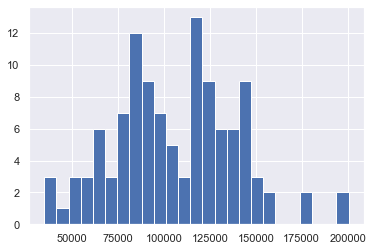

In [371]:
plt.hist(x=df[df['Garage Yr Blt'].isna()]['SalePrice'], bins=25);

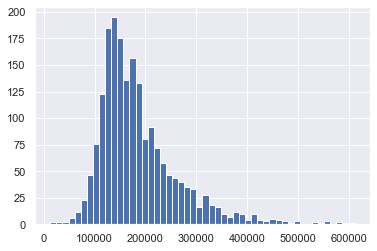

In [372]:
plt.hist(x=df[~df['Garage Yr Blt'].isna()]['SalePrice'], bins=50);

In [373]:
print(df['Garage Yr Blt'].median())
print(df['Garage Yr Blt'].mean())
#df['Garage Yr Blt'] = df['Gara']

1980.0
1978.7077955601446


In [374]:
df['Garage Yr Blt'].fillna(df['Garage Yr Blt'].mean(), inplace=True)

In [375]:
df[df['Garage Area'].isna()]

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
1712,2237,910201180,70,RM,50.0,9060,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,2Story,5,6,1923,1999,Gable,CompShg,Wd Sdng,Plywood,None,0.0,3.0,3.0,BrkTil,4.0,3.0,No,ALQ,548.0,Unf,0.0,311.0,859.0,GasA,5.0,Y,SBrkr,942,886,0,1828,0.0,0.0,2,0,3,1,4.0,6,Typ,0,0.0,Detchd,1978.707796,NaN,NaN,NaN,0.0,0.0,Y,174,0,212,0,0,0,0.0,MnPrv,NaN,0,3,2007,WD,150909


In [376]:
df['Garage Cars'].fillna(0, inplace=True)
df['Garage Area'].fillna(0, inplace=True)

In [377]:
bsmt_fin_type_count_mean = df.groupby('BsmtFin Type 1')['SalePrice'].agg(['count','mean']).sort_values('count', ascending=False)
display(bsmt_fin_type_count_mean)

,count,mean
BsmtFin Type 1,,
GLQ,615,237597.245528
Unf,603,166155.257048
ALQ,293,164368.017065
BLQ,200,150107.020000
Rec,183,143263.382514
LwQ,102,153266.921569


In [378]:
# df['bsmt_fin_type_less_than_equal_to_150k'] = ((df['BsmtFin Type 1'] == 'LwQ') or df['BsmtFin Type 1']=='Rec' or df['BsmtFin Type 1'] = 'BLQ').astype(int)
# df['bsmt_fin_type_150k_200k'] = (df['BsmtFin Type 1'] == 'ALQ' or df['BsmtFin Type 1'] == 'UnF').astype(int)
# df['bsmt_fin_type_200k'] = (df['BsmtFin Type 1'] == 'GLQ').astype(int)

In [379]:
vnr_type_count_mean = df.groupby('Mas Vnr Type')['SalePrice'].agg(['count','mean']).sort_values('count', ascending=False)
display(vnr_type_count_mean)

,count,mean
Mas Vnr Type,,
None,1218,153679.275862
BrkFace,630,212161.436508
Stone,168,263714.702381
BrkCmn,13,144515.692308


In [380]:
# df['is_brk_face'] = (df['Mas Vnr Type'] == 'BrkFace').astype(int)
# df['is_stone'] = (df['Mas Vnr Type'] == 'Stone').astype(int)

In [381]:
# grouby neighborhood, display count of each instance of the neighborhood. Display, the average price
# bucket into separate category and drop sparse values from regression 
neighborhood_count_mean = df.groupby('Neighborhood')['SalePrice'].agg(['count','mean']).sort_values('count', ascending=False)
display(neighborhood_count_mean)

,count,mean
Neighborhood,,
NAmes,310,145905.816129
CollgCr,180,202497.216667
OldTown,163,125276.300613
Edwards,143,130493.468531
Somerst,130,227183.900000
NridgHt,122,322831.352459
Gilbert,116,189228.387931
Sawyer,111,137181.909910
SawyerW,87,187760.160920


In [382]:
neighborhood_150k_values = neighborhood_count_mean[(neighborhood_count_mean['count'] > 100) & (neighborhood_count_mean['mean'] < 150_000)].index.to_list()
neighborhood_150k_250k_values = neighborhood_count_mean[(neighborhood_count_mean['count'] > 100) & 
                                (neighborhood_count_mean['mean'] >= 150_000) & 
                                                        (neighborhood_count_mean['mean'] < 250_000)].index.to_list()
neighborhood_250k_values = neighborhood_count_mean[(neighborhood_count_mean['count'] > 100) & (neighborhood_count_mean['mean'] >= 250_000)].index.to_list()

In [383]:
neighborhood_150k_mask = df['Neighborhood'].isin(neighborhood_150k_values) #.astype(int)
neighborhood_150k_250k_mask = df['Neighborhood'].isin(neighborhood_150k_250k_values) #.astype(int)
neighborhood_250k_mask = df['Neighborhood'].isin(neighborhood_250k_values) #.astype(int)
display(neighborhood_150k_mask)
# sale_price_less_150k = (mask['SalePrice'] < 150_000).astype(int)
# sale_price_150k_250k = ((mask['SalePrice'] >= 150_000) & (mask['SalePrice'] < 250_000)).astype(int)
# sale_price_greater_250k = (mask['SalePrice'] >= 250_000).astype(int)

df['neighborhood_mask_less_150k'] = neighborhood_150k_mask.astype(int) #sale_price_less_150k
df['neighborhood_mask_150k_250k'] = neighborhood_150k_250k_mask.astype(int) #sale_price_150k_250k
df['neighborhood_mask_greater_250k'] = neighborhood_250k_mask.astype(int) #sale_price_greater_250k
#display(df)
neighborhood_list = ['neighborhood_mask_less_150k', 'neighborhood_mask_150k_250k', 'neighborhood_mask_greater_250k']

df.loc[:, neighborhood_list] = df[neighborhood_list].fillna(0)
#sale_price_less_150k
#pd.get_dummies(data=df[mask], columns=['SalePrice'] > 100_000)

#pd.get_dummies(data=non_sparse_neighborhood, sale_price_less_150k)
# non_sparse_neighborhood[non_sparse_neighborhood['SalePrice'] < 200_000]
# non_sparse_neighborhood[non_sparse_neighborhood['SalePrice'] < 200_000]

#df['neighborhood_100k'] = [1 if math.floor(non_sparse_neighborhood['SalePrice']) 

0        True
1       False
2        True
3       False
4       False
        ...  
2046    False
2047     True
2048    False
2049     True
2050    False
Name: Neighborhood, Length: 2051, dtype: bool

In [384]:
subclass_count_mean = df.groupby('MS SubClass')['SalePrice'].agg(['count','mean']).sort_values('count', ascending=False)
display(subclass_count_mean)

,count,mean
MS SubClass,,
20,770,189305.488312
60,394,239225.769036
50,198,137270.000000
120,132,211813.613636
30,101,94936.346535
70,90,153354.455556
160,88,138452.215909
80,86,169569.825581
90,75,139296.333333


In [385]:
# subclass_values = subclass_count_mean[subclass_count_mean['count'] >= 90].index

In [386]:
sclass_150k_values = subclass_count_mean[(subclass_count_mean['count'] > 100) & (subclass_count_mean['mean'] < 150_000)].index.to_list()
sclass_150k_200k_values = subclass_count_mean[(subclass_count_mean['count'] > 100) & 
                                (subclass_count_mean['mean'] >= 150_000) & 
                                                        (subclass_count_mean['mean'] < 200_000)].index.to_list()
sclass_200k_values = subclass_count_mean[(subclass_count_mean['count'] > 100) & (subclass_count_mean['mean'] >= 200_000)].index.to_list()


sclass_150k_mask = df['MS SubClass'].isin(sclass_150k_values) #.astype(int)
sclass_150k_200k_mask = df['MS SubClass'].isin(sclass_150k_200k_values) #.astype(int)
sclass_200k_mask = df['MS SubClass'].isin(sclass_200k_values) #.astype(int)
#display(neighborhood_150k_mask)

# mask_2 = df[df['MS SubClass'].isin(subclass_values)]

# sclass_sale_price_less_150k = (mask_2['SalePrice'] < 150_000).astype(int)
# sclass_sale_price_150k_250k = ((mask_2['SalePrice'] >= 150_000) & (mask['SalePrice'] < 250_000)).astype(int)
# sclass_sale_price_greater_250k = (mask_2['SalePrice'] >= 250_000).astype(int)

# print(len(sclass_sale_price_less_150k[sclass_sale_price_less_150k == 1]))

df['sclass_mask_less_150k'] = sclass_150k_mask.astype(int)
df['sclass_mask_150k_200k'] = sclass_150k_200k_mask.astype(int)
df['sclass_mask_greater_200k'] = sclass_200k_mask.astype(int)

sclass_list = ['sclass_mask_less_150k', 'sclass_mask_150k_200k', 'sclass_mask_greater_200k']

df.loc[:, sclass_list] = df[sclass_list].fillna(0)

In [387]:
df['Lot Area'].describe()

count      2051.000000
mean      10065.208191
std        6742.488909
min        1300.000000
25%        7500.000000
50%        9430.000000
75%       11513.500000
max      159000.000000
Name: Lot Area, dtype: float64

In [388]:
df[df['Lot Frontage'].isna() & (df['Lot Area'].isna())].shape

(0, 87)

In [389]:
# Want to know distribution of lot area for lot frontage null or not

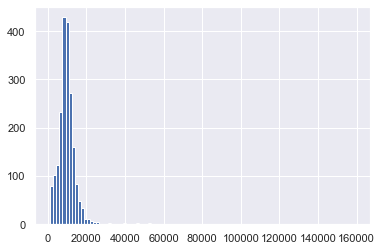

In [390]:
plt.hist(x=df[~df['Lot Frontage'].isna()]['Lot Area'], bins=100);

In [391]:
# Lot area and lot frontage have similar distribution, so safe to impute null with lot frontage mean
df['Lot Frontage'].fillna(df['Lot Frontage'].mean(), inplace=True)

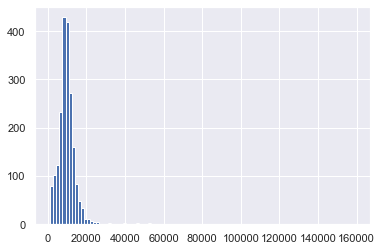

In [392]:
plt.hist(x=df['Lot Area'], bins=100);

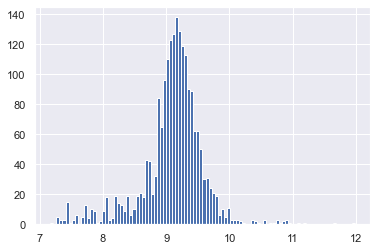

In [393]:
plt.hist(x=df['Lot Area'].map(np.log),bins=100);

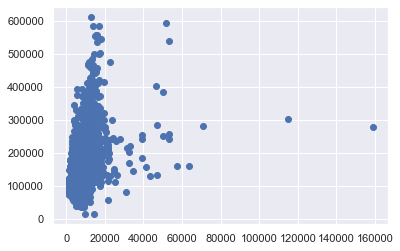

In [394]:
plt.scatter(x=df['Lot Area'], y=df['SalePrice'])

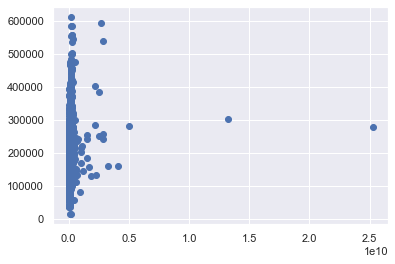

In [395]:
plt.scatter(x=np.power(df['Lot Area'], [2]), y=df['SalePrice'])

In [396]:
df[df['Lot Area'] == df['Lot Area'].max()] # does not seem right

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice,neighborhood_mask_less_150k,neighborhood_mask_150k_250k,neighborhood_mask_greater_250k,sclass_mask_less_150k,sclass_mask_150k_200k,sclass_mask_greater_200k
471,2116,906426060,50,RL,0.0,159000,Pave,NaN,IR2,Low,AllPub,CulDSac,Sev,ClearCr,Norm,Norm,1Fam,1.5Fin,6,7,1958,2006,Gable,CompShg,Wd Sdng,HdBoard,BrkCmn,472.0,4.0,3.0,CBlock,4.0,3.0,Gd,Rec,697.0,Unf,0.0,747.0,1444.0,GasA,4.0,Y,SBrkr,1444,700,0,2144,0.0,1.0,2,0,4,1,4.0,7,Typ,2,3.0,Attchd,1958.0,Fin,2.0,389.0,3.0,3.0,Y,0,98,0,0,0,0,0.0,NaN,Shed,500,6,2007,WD,277000,0,0,0,1,0,0


In [397]:
#df.drop([960,1628,183,1885, 952], inplace=True)
#df.drop([960,1628,183,1885,952], inplace=True)
#df.drop([960,1885, 823, 800], inplace=True)
#1885, 823, 800
# # 960     17.557810
# 1628    
# 183     
# 1885    
# 952  
# 960     
# 1628    
# 183     
# 1885    
# 952      
# 304      
# 1309     
# 408 

In [398]:
x_test_vars = df._get_numeric_data().columns.drop(['PID', "SalePrice"]).to_list()
x_vars = df._get_numeric_data().columns.drop(['Id','PID', 'MS SubClass']).to_list()
x_rfe_vars =  df._get_numeric_data().columns.drop(['Id','PID', 'MS SubClass', 'Bsmt Unf SF']).to_list()
#'Pool QC', 'Pool Area', 'Year Remod/Add', 'Misc Val', 'Mo Sold'

In [399]:
# x_vars

<AxesSubplot:>

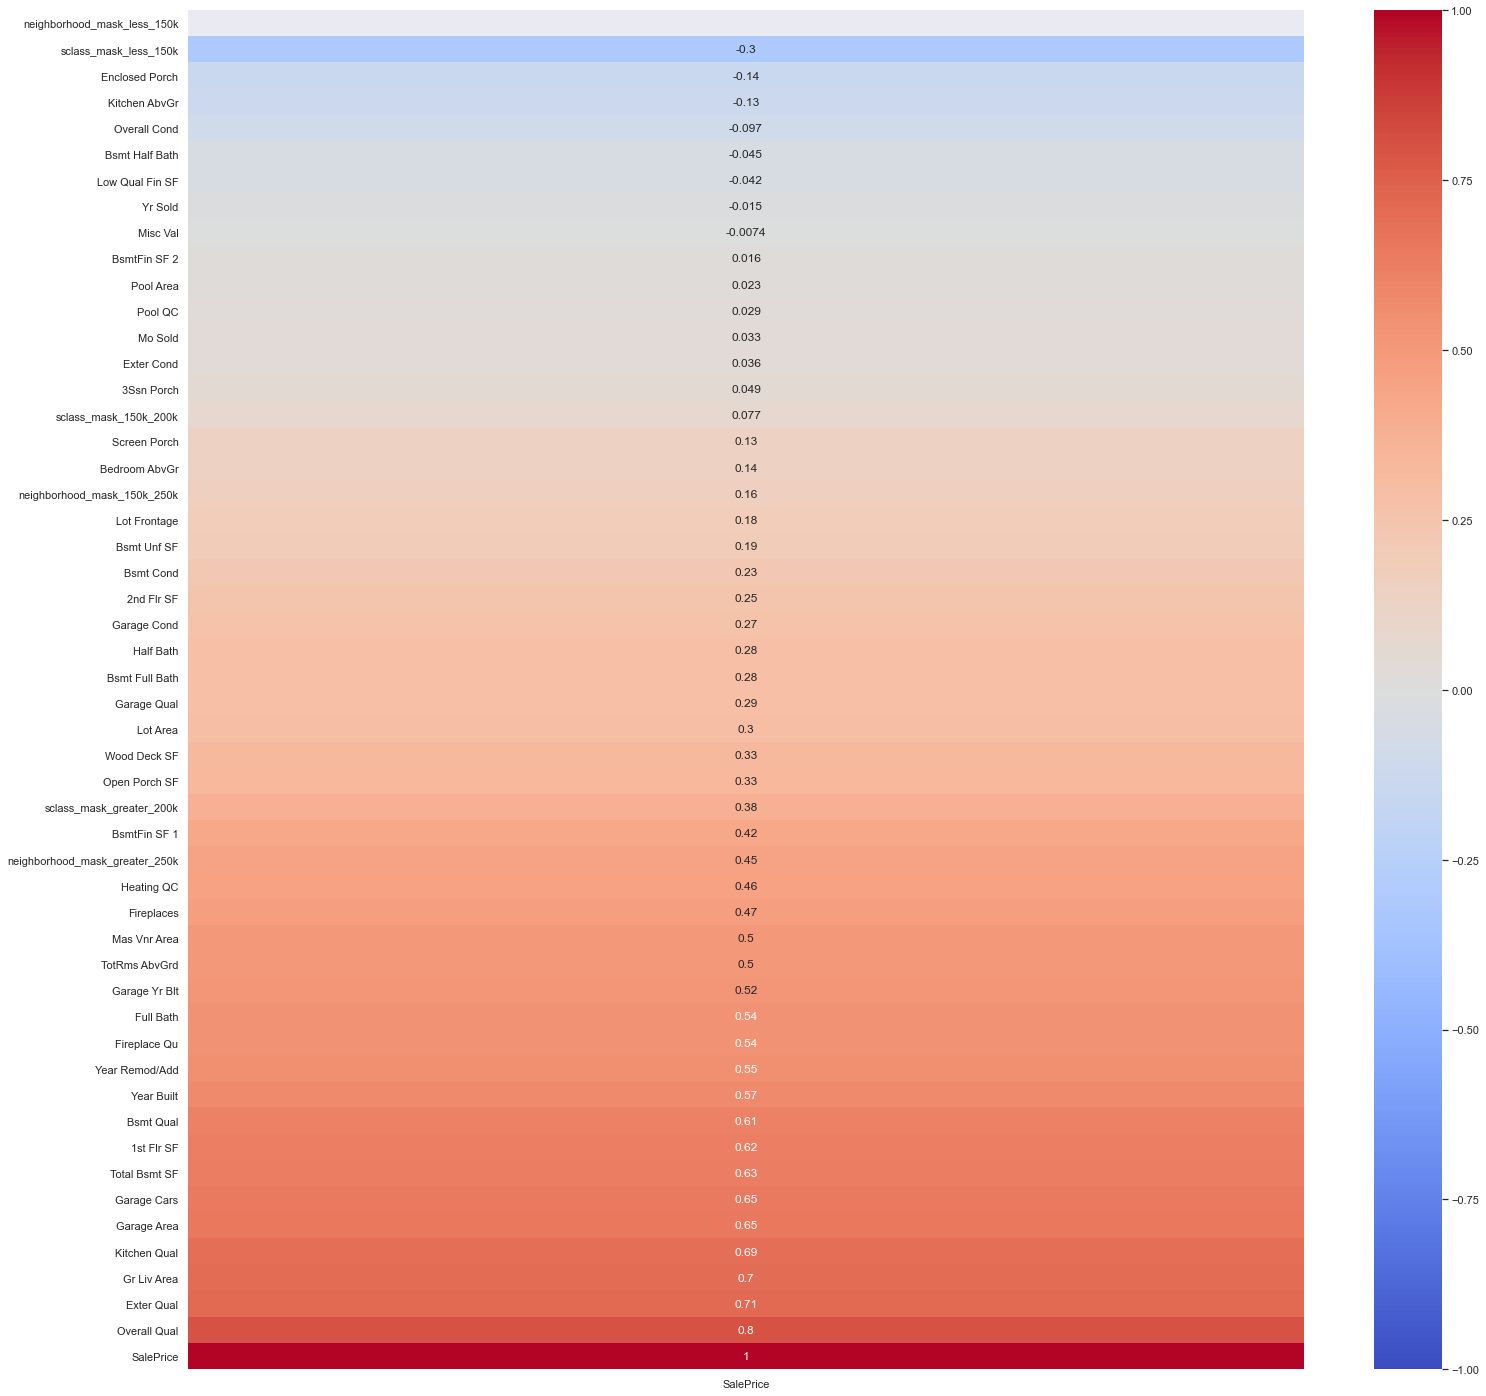

In [400]:
corr = df[x_vars].corr()[['SalePrice']].sort_values('SalePrice')
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)]= True

plt.figure(figsize=(25,25))
sns.set(font_scale=1)
sns.heatmap(corr, annot=True,
           cmap='coolwarm',vmin=-1,vmax=1, mask=mask)

In [401]:
# lm = LinearRegression()
# rfe = RFE(lm, n_features_to_select=50)
# rfe.fit(df[x_vars], df['SalePrice'])
# h = pd.DataFrame({'RFE Coef_': rfe.ranking_, 'Feature': x_rfe_vars})

In [402]:
#display(h)

In [403]:
x_vars.remove('SalePrice')

In [404]:
# x_vars

In [405]:
X = df[x_vars]
y = df['SalePrice']

In [406]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=73)

### Linear Regression

In [407]:
y_train_log = y_train.map(np.log)
y_test_log = y_test.map(np.log)
y_log = y.map(np.log)

In [408]:
lr = LinearRegression()
lr.fit(X_train, y_train_log)

LinearRegression()

In [409]:
lr.score(X_train, y_train_log)

0.9071880689048155

In [410]:
lr.score(X_test, y_test_log)

0.47485161639179785

In [411]:
pred = lr.predict(X_test)
residuals = y_test_log - pred
pred_prices = np.exp(pred)
#pred_prices

In [412]:
metrics.r2_score(y_test, pred_prices)

-9.517747364491706

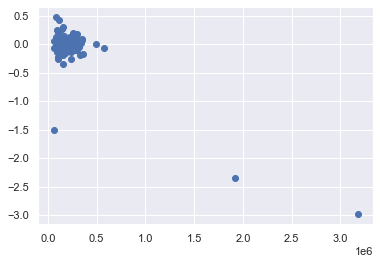

In [413]:
plt.scatter(x=pred_prices, y=residuals)

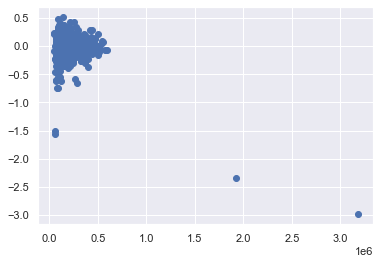

In [414]:
total_preds = lr.predict(X)
total_residuals = y_log - total_preds
total_pred_prices = np.exp(total_preds)
plt.scatter(x=total_pred_prices, y=total_residuals)

In [423]:
# Predictors span the entire set of observations 
X_train_sm = sm.add_constant(X, prepend=True)

# Instantiating and fitting statsmodels ordinary least squares
lr_model = sm.OLS(y_log, X_train_sm).fit()

In [424]:
# Performing statsmodels outliers test, calculates leveraged (AKA studentized) residuals
outliers = lr_model.outlier_test()

# Gathering 5 largest outliers according to leveraged residuals
outliers['student_resid'].abs().sort_values(ascending=False).head(n=5)

960     16.897792
1628    11.360586
183     10.624562
1885    10.480527
952      6.635053
Name: student_resid, dtype: float64

In [425]:
# Calculating predicted prices for ordinary least squares
sm_pred_prices = np.exp(lr_model.predict(X_train_sm))

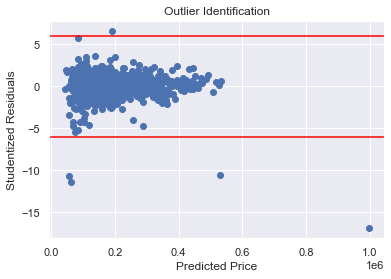

In [428]:
# Plotting leveraged residuals versus the predicted prices
student_res = outliers['student_resid']

# Most data points concentrated between -6 and 6 studentized residuals
# Outliers are thus greater than 6 or less than -5
plt.axhline(y=-6, color='red')
plt.axhline(y=6, color='red')
plt.scatter(x=sm_pred_prices, y=student_res)

plt.title('Outlier Identification')
plt.ylabel('Studentized Residuals')
plt.xlabel('Predicted Price')

plt.savefig('./figures/outlier_identification.png', format='png');

In [298]:
# lasso_resid_df = pd.DataFrame({'y_test': y_test, 'lr_predicts': pred_prices, 'lr_residuals': residuals})
# lasso_resid_df.sort_values('lr_residuals').head()

### Lasso Regularization

In [299]:
ssc = StandardScaler()
Z_train = ssc.fit_transform(X_train)
Z_test = ssc.transform(X_test)

In [300]:
lasso_alphas = np.logspace(0, 175, 250)

lasso = LassoCV(alphas=lasso_alphas, cv=5, max_iter=50000)

lasso.fit(Z_train, y_train)

LassoCV(alphas=array([1.00000000e+000, 5.04442007e+000, 2.54461738e+001, 1.28361190e+002,
       6.47507764e+002, 3.26630116e+003, 1.64765951e+004, 8.31148671e+004,
       4.19266304e+005, 2.11495536e+006, 1.06687233e+007, 5.38175217e+007,
       2.71478187e+008, 1.36945001e+009, 6.90808114e+009, 3.48472631e+010,
       1.75784234e+011, 8.86729516e+011, 4.47303617e+012, 2.25638734e+013,
       1.138216...
       1.74166192e+160, 8.78567432e+160, 4.43186319e+161, 2.23561796e+162,
       1.12773961e+163, 5.68879233e+163, 2.86966582e+164, 1.44757999e+165,
       7.30220154e+165, 3.68353720e+166, 1.85813090e+167, 9.37319280e+167,
       4.72823219e+168, 2.38511893e+169, 1.20315418e+170, 6.06921511e+170,
       3.06156705e+171, 1.54438303e+172, 7.79051674e+172, 3.92986390e+173,
       1.98238843e+174, 1.00000000e+175]),
        cv=5, max_iter=50000)

In [301]:
pd.DataFrame({'Lasso_coef':lasso.coef_, 'Feature': x_vars})

,Lasso_coef,Feature
0,3506.316143,Lot Frontage
1,5602.493055,Lot Area
2,14398.032125,Overall Qual
3,6336.208617,Overall Cond
4,7915.501085,Year Built
5,0.000000,Year Remod/Add
6,4606.840132,Mas Vnr Area
7,9090.643123,Exter Qual
8,-595.492217,Exter Cond
9,5012.655324,Bsmt Qual


In [302]:
lasso_predicts = lasso.predict(Z_test)

In [303]:
metrics.r2_score(y_test, lasso_predicts)

0.885824950561312

In [304]:
lasso_residuals = y_test - lasso_predicts

In [305]:
lasso_resid_df = pd.DataFrame({'y_test': y_test, 'lasso_predicts': lasso_predicts, 'lasso_residuals': lasso_residuals})
lasso_resid_df.sort_values('lasso_residuals', ascending=False)

,y_test,lasso_predicts,lasso_residuals
1136,392000,253567.068435,138432.931565
1211,230000,144157.081485,85842.918515
1771,395000,310380.381270,84619.618730
1458,216000,131568.879868,84431.120132
333,214500,160234.887465,54265.112535
489,421250,375510.450721,45739.549279
1477,319900,276006.464033,43893.535967
452,149900,110149.992100,39750.007900
495,117000,78099.022128,38900.977872
2017,82000,43391.431989,38608.568011


In [306]:
# Df drop 960, 1885, 823, 800, 1592

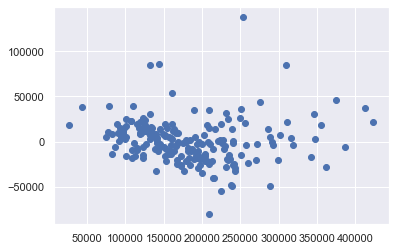

In [307]:
plt.scatter(x=lasso_predicts, y=lasso_residuals)

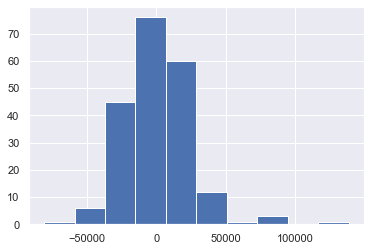

In [308]:
plt.hist(x=lasso_residuals);

In [309]:
lasso.score(X_test, y_test)

-3015246.62175115

In [310]:
test_df = pd.read_csv('datasets/test.csv')

In [311]:
#neighborhood_test_count_mean = test_df.groupby('Neighborhood')['SalePrice'].agg(['count','mean']).sort_values('count', ascending=False)
#neighborhood_test_values = neighborhood_test_count_mean[neighborhood_test_count_mean['count'] > 100].index

# mask_test = test_df[test_df['Neighborhood'].isin(neighborhood_values)]

# sale_price_less_150k = (mask_test['SalePrice'] < 150_000).astype(int)
# sale_price_150k_250k = ((mask_test['SalePrice'] >= 150_000) & (mask['SalePrice'] < 250_000)).astype(int)
# sale_price_greater_250k = (mask_test['SalePrice'] >= 250_000).astype(int)

# test_df['neighborhood_mask_less_150k'] = sale_price_less_150k
# test_df['neighborhood_mask_150k_250k'] = sale_price_150k_250k
# test_df['neighborhood_mask_greater_250k'] = sale_price_greater_250k

# neighborhood_test_list = ['neighborhood_mask_less_150k', 'neighborhood_mask_150k_250k', 'neighborhood_mask_greater_250k']

# test_df.loc[:, neighborhood_test_list] = test_df[neighborhood_test_list].fillna(0)

In [312]:
test_df['Garage Cars'].fillna(0, inplace=True)
test_df['Garage Area'].fillna(0, inplace=True)

In [313]:
test_df[ordinal_list] = test_df[ordinal_list].applymap(qual_to_quant_scale.get)
test_df.loc[:, ordinal_list] = test_df[ordinal_list].astype(float)
test_df.loc[:, ordinal_list] = test_df[ordinal_list].fillna(0)

In [314]:
test_df['Lot Frontage'] = test_df['Lot Frontage'].fillna(0)

In [315]:
test_df['Mas Vnr Area'].fillna(0, inplace=True)

In [316]:
test_df['BsmtFin SF 1'].fillna(0, inplace=True)
test_df['BsmtFin SF 2'].fillna(0, inplace=True)
test_df['Bsmt Unf SF'].fillna(0, inplace=True)
test_df['Total Bsmt SF'].fillna(0, inplace=True)

In [317]:
test_df['Bsmt Full Bath'].fillna(0, inplace=True)

test_df['Bsmt Half Bath'].fillna(0, inplace=True)

In [318]:
test_df['Garage Yr Blt'].fillna(df['Garage Yr Blt'].mean(), inplace=True)

In [319]:
test_df['Garage Cars'].fillna(0, inplace=True)
test_df['Garage Area'].fillna(0, inplace=True)

In [320]:
test_neighborhood_150k_mask = test_df['Neighborhood'].isin(neighborhood_150k_values) #.astype(int)
test_neighborhood_150k_250k_mask = test_df['Neighborhood'].isin(neighborhood_150k_250k_values) #.astype(int)
test_neighborhood_250k_mask = test_df['Neighborhood'].isin(neighborhood_250k_values) #.astype(int)
#display(neighborhood_150k_mask)
# sale_price_less_150k = (mask['SalePrice'] < 150_000).astype(int)
# sale_price_150k_250k = ((mask['SalePrice'] >= 150_000) & (mask['SalePrice'] < 250_000)).astype(int)
# sale_price_greater_250k = (mask['SalePrice'] >= 250_000).astype(int)

test_df['neighborhood_mask_less_150k'] = test_neighborhood_150k_mask.astype(int) #sale_price_less_150k
test_df['neighborhood_mask_150k_250k'] = test_neighborhood_150k_250k_mask.astype(int) #sale_price_150k_250k
test_df['neighborhood_mask_greater_250k'] = test_neighborhood_250k_mask.astype(int) #sale_price_greater_250k
#display(df)
test_neighborhood_list = ['neighborhood_mask_less_150k', 'neighborhood_mask_150k_250k', 'neighborhood_mask_greater_250k']

test_df.loc[:, neighborhood_list] = test_df[neighborhood_list].fillna(0)

In [321]:
test_sclass_150k_mask = test_df['MS SubClass'].isin(sclass_150k_values) #.astype(int)
test_sclass_150k_200k_mask = test_df['MS SubClass'].isin(sclass_150k_200k_values) #.astype(int)
test_sclass_200k_mask = test_df['MS SubClass'].isin(sclass_200k_values) #.astype(int)
#display(neighborhood_150k_mask)

# mask_2 = df[df['MS SubClass'].isin(subclass_values)]

# sclass_sale_price_less_150k = (mask_2['SalePrice'] < 150_000).astype(int)
# sclass_sale_price_150k_250k = ((mask_2['SalePrice'] >= 150_000) & (mask['SalePrice'] < 250_000)).astype(int)
# sclass_sale_price_greater_250k = (mask_2['SalePrice'] >= 250_000).astype(int)

# print(len(sclass_sale_price_less_150k[sclass_sale_price_less_150k == 1]))

test_df['sclass_mask_less_150k'] = test_sclass_150k_mask.astype(int)
test_df['sclass_mask_150k_200k'] = test_sclass_150k_200k_mask.astype(int)
test_df['sclass_mask_greater_200k'] = test_sclass_200k_mask.astype(int)

test_sclass_list = ['sclass_mask_less_150k', 'sclass_mask_150k_200k', 'sclass_mask_greater_200k']

df.loc[:, test_sclass_list] = test_df[test_sclass_list].fillna(0)

In [322]:
X_test_df = test_df[x_test_vars]

In [323]:
X_test_df.isnull().sum()

Id                                0
MS SubClass                       0
Lot Frontage                      0
Lot Area                          0
Overall Qual                      0
Overall Cond                      0
Year Built                        0
Year Remod/Add                    0
Mas Vnr Area                      0
Exter Qual                        0
Exter Cond                        0
Bsmt Qual                         0
Bsmt Cond                         0
BsmtFin SF 1                      0
BsmtFin SF 2                      0
Bsmt Unf SF                       0
Total Bsmt SF                     0
Heating QC                        0
1st Flr SF                        0
2nd Flr SF                        0
Low Qual Fin SF                   0
Gr Liv Area                       0
Bsmt Full Bath                    0
Bsmt Half Bath                    0
Full Bath                         0
Half Bath                         0
Bedroom AbvGr                     0
Kitchen AbvGr               

In [324]:
test_id = X_test_df['Id']
X_test_df.drop(columns=['Id', 'MS SubClass'], inplace=True)

/Users/johnnybex/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [325]:
Z_test_df = ssc.transform(X_test_df)

In [326]:
#test_preds = lasso.predict(Z_test_df)

test_pred = lr.predict(X_test_df)

#residuals = y_test_log - pred
pred_prices = np.exp(test_pred)


In [327]:
test_saleprice = pd.DataFrame(test_id)
test_saleprice['SalePrice'] = pred_prices

In [328]:
test_saleprice

,Id,SalePrice
0,2658,133910.327810
1,2718,154764.011079
2,2414,211108.872398
3,1989,109168.611506
4,625,171148.051253
5,333,103083.685698
6,1327,107673.553283
7,858,144944.418067
8,95,178054.599253
9,1568,168688.905820


In [329]:
test_saleprice.to_csv('output/prediction_19.csv', index=False)